# Visualising Results from Training and Evaluation
This notebook is used to generate the graphs, figures etc. needed from the actions files used previously during training and evaluation of models.

In [11]:
#Extracting info from config files
import configparser
import os
import numpy as np
import matplotlib.pyplot as plt

data_path = os.path.join('pyperbot_v2', 'logs', 'good_actions')


dttg_list = []
reward_list = []
config = configparser.ConfigParser()

for file in os.listdir(data_path):
    if file.endswith('.ini'):
        config.read(os.path.join(data_path, file))
        dttg_list.append(config['DISTANCE']['distance_travelled_to_goal']) if config['TERMINATION']['termination'] != 'not done' else None
        reward_list.append(config['REWARD']['cum_reward']) if config['TERMINATION']['termination'] != 'not done' else None

print(dttg_list)

['0.4034602275504193', '0.5848638614418489', '2.8367167761820586', '3.878918857492477', '4.000150824152088', '0.9053379204372929', '0.9040954786818975', '1.3850687922935743', '0.6331950914309177', '0.02295283630253575', '0.9918165005562702', '2.852392059107023', '0.7777015321261667', '-0.049770494612983995', '0.9999938072847145', '1.7720682434331807', '0.4157739277339605', '0.5107425826990202', '0.7871477775277143', '2.4791824069951574', '0.6946502133600676', '2.1698003379931547', '0.9130810918143277', '0.9998750926612425', '2.9178892506773053', '1.2250357378262176', '3.677052927478804', '3.28585372420613', '1.2826595551699858', '2.9474963436795805', '4.000261983208714', '3.519954788552117', '3.8664200575308936', '4.00028275940388', '4.000504324000618', '3.1874403358675623', '4.000472452794886', '4.000373206781537', '3.0834730369540164', '2.927808951436154', '3.387853375157019', '4.00102584848018', '3.3105831327177793', '4.000428998660424', '4.000875057250728', '4.000582922898498', '4.

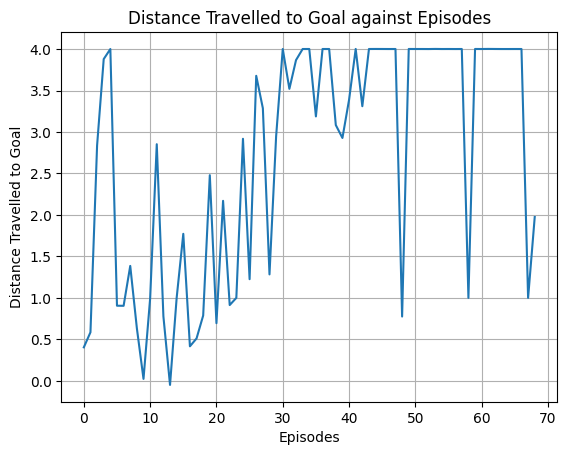

In [12]:
#plot of distance vs episodes
plt.plot(range(len(dttg_list)), [float(i) for i in dttg_list])
plt.title('Distance Travelled to Goal against Episodes')
plt.xlabel('Episodes')
plt.ylabel('Distance Travelled to Goal')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/dttg.png')


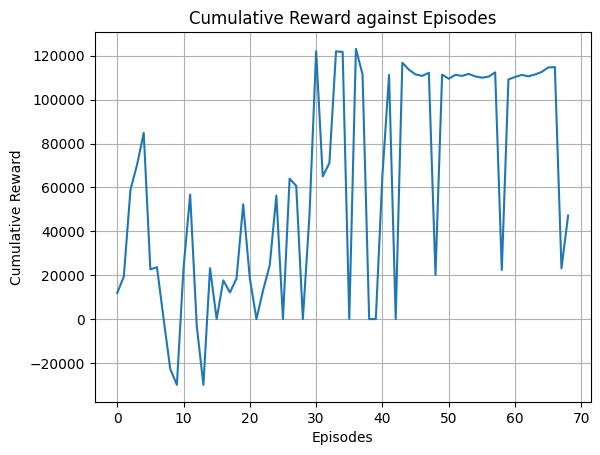

In [13]:
plt.plot(range(len(reward_list)), [float(i) for i in reward_list])
plt.title('Cumulative Reward against Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward.png')


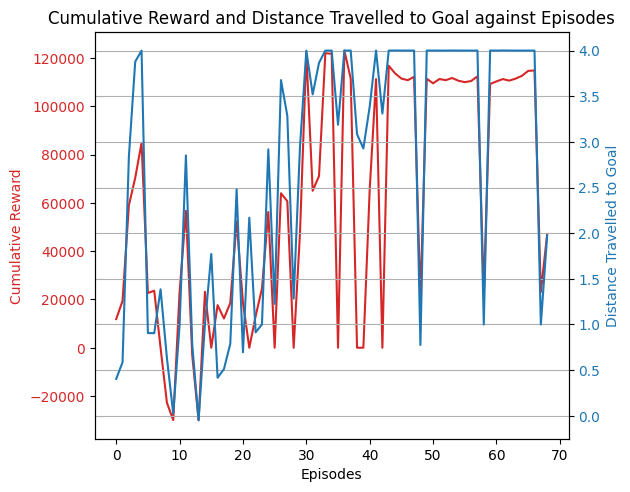

In [14]:
#Comparing Cumulative Reward vs Distance Travelled to Goal (two different axes) #use semilog y
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Distance Travelled to Goal', color=color)
ax2.plot(range(len(dttg_list)), [float(i) for i in dttg_list], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Cumulative Reward and Distance Travelled to Goal against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_dttg.png')


['0.0005475877317130013', '0.0006335432651642176', '0.0006434819822446387', '0.0006356125051483274', '0.0006731882918304008', '0.0005923667113112726', '0.0007778672009854227', '0.0005756062336127393', '0.0006011451642536923', '0.0006073074425336496', '0.0005595569261578985', '0.0005185230967648626', '0.0007323202011181601', '0.0007844408484516253', '0.0004497745783745764', '0.0004683813952028861', '0.0006368000342616559', '0.0006772126289177365', '0.0005693559388673569', '0.000567559980710189', '0.000512707125812324', '0.0006531183012629526', '0.0005672957560920893', '0.0005167947041948746', '0.0004622817807372954', '0.0005263931125587769', '0.0004372370753285299', '0.0004798509355798429', '0.0007905693483461633', '0.000651189491874467', '0.0004460392612829754', '0.0005674331806073536', '0.0006806156255601795', '0.0004318679481731081', '0.00046914270771455425', '0.000638325707572864', '0.000565994710727575', '0.000449724468468661', '0.0006336724257688717', '0.0006474101641568141', '0.0

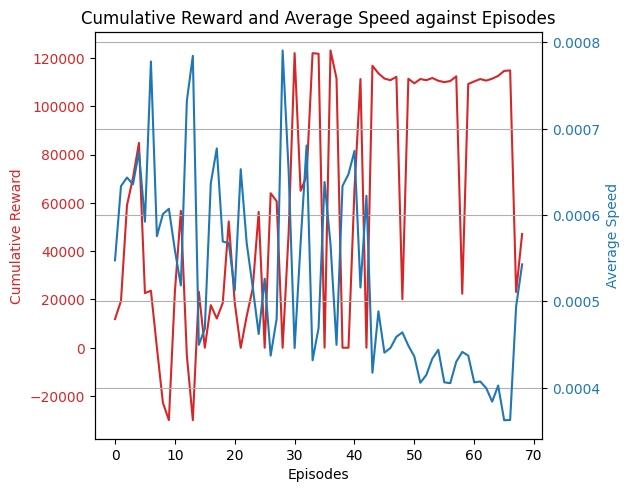

In [15]:
#average speed vs episodes
speed_list = []
for file in os.listdir(data_path):
    if file.endswith('.ini'):
        config.read(os.path.join(data_path, file))
        speed_list.append(config['DISTANCE']['average_speed']) if config['TERMINATION']['termination'] != 'not done' else None

print(speed_list)

#comparison of average speed vs rewards against episodes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Speed', color=color)
ax2.plot(range(len(speed_list)), [float(i) for i in speed_list], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and Average Speed against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_speed.png')


['8001', '8001', '20000', '20000', '19943', '8001', '8001', '11849', '8001', '4478', '8001', '20000', '8001', '7069', '8437', '11536', '8001', '8001', '8001', '20000', '8001', '16775', '8001', '8941', '20000', '13588', '20000', '20000', '11369', '20000', '19498', '20000', '20000', '19602', '18982', '18716', '18664', '12118', '17080', '17680', '20000', '11474', '13098', '16342', '13267', '12227', '11734', '12569', '8001', '12096', '10878', '12368', '11969', '12413', '11585', '11490', '11878', '12979', '8325', '10619', '11652', '12322', '11905', '12688', '13358', '15241', '15407', '8171', '20000']


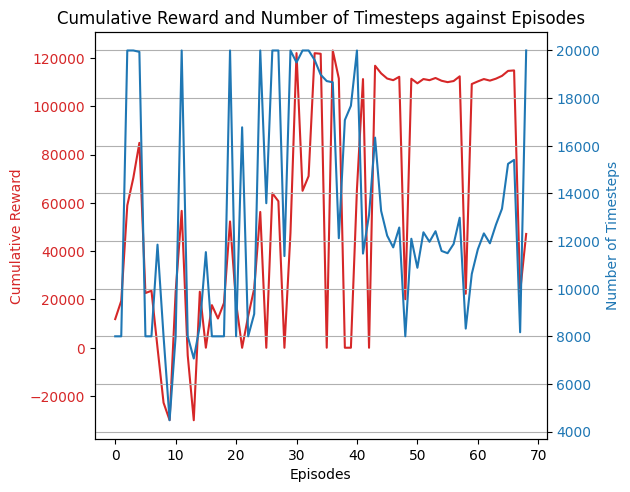

In [16]:
#comparison of number of timesteps vs rewards against episodes
timesteps_list = []
for file in os.listdir(data_path):
    if file.endswith('.ini'):
        config.read(os.path.join(data_path, file))
        timesteps_list.append(config['TIMESTEPS']['timestep']) if config['TERMINATION']['termination'] != 'not done' else None

print(timesteps_list)

#comparison of number of timesteps vs rewards against episodes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Timesteps', color=color)
ax2.plot(range(len(timesteps_list)), [float(i) for i in timesteps_list], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and Number of Timesteps against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_timesteps.png')





[[-0.4139140710218085, -0.3098285521689028, 0.06211058268275437], [-0.7010693069756331, 1.0062912195657958, 0.05371069126050396], [-2.8970536553824004, 0.507356854799086, 0.05294876472251667], [-4.09882502784274, 0.6668632525813183, 0.05393331414844033], [-4.257518386007947, 0.6696412676407462, 0.0530819417480486], [-0.9503682269043422, -0.6055906605479591, 0.05181580706564586], [-1.119976691964142, 1.3121939555006927, 0.05391507431493459], [-1.821502009608223, -1.7218821566893807, 0.0624843569825712], [-0.9903552305611761, -1.7296629534145986, 0.0510695283120924], [-0.16013780034809572, -1.1604879827252013, 0.05595200150323302], [-1.057503827669838, -0.7226748206316641, 0.05391502870044225], [-2.971030667570889, -0.703919964093036, 0.06111710032737794], [-0.9521656687123892, -1.2011834074191607, 0.05184905932801123], [-0.1653166125345632, -1.4580873057638195, 0.05107559785713633], [-1.100960420651043, -0.8930508946476341, 0.052101424785634204], [-2.3754857427936895, -1.879220141115287

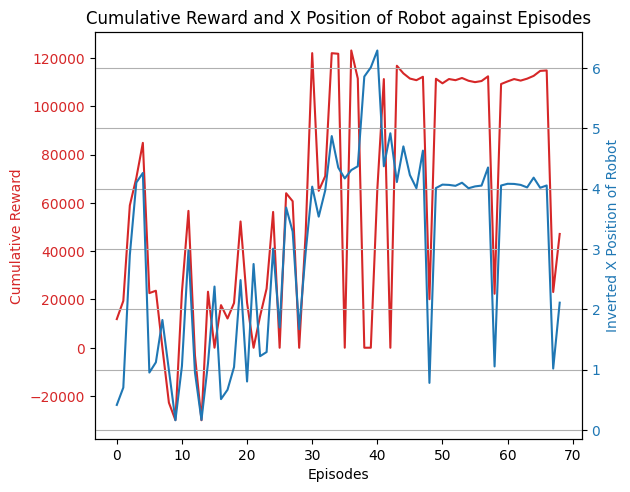

In [17]:
#Comparison of x and y position of robot against rewards against episodes
x_pos = []
y_pos = []
snake_pos_vals = []

for file in os.listdir(data_path):
    if file.endswith('.ini'):
        config.read(os.path.join(data_path, file))
        #extract individual numerical values from string
        snake_pos_str = config.get('SNAKE', 'snake_pos')
        snake_pos_str = snake_pos_str.strip('(').strip(')')
        snake_pos_values = snake_pos_str.split(', ')
        snake_pos_ints = [float(value) for value in snake_pos_values]
        snake_pos_vals.append(snake_pos_ints) if config['TERMINATION']['termination'] != 'not done' else None
        x_pos.append(config['SNAKE']['snake_pos'][0]) if config['TERMINATION']['termination'] != 'not done' else None
        y_pos.append(config['SNAKE']['snake_pos'][1]) if config['TERMINATION']['termination'] != 'not done' else None

print(snake_pos_vals)
x_pos = [-float(snake_pos_vals[i][0]) for i in range(len(snake_pos_vals))]
y_pos = [float(snake_pos_vals[i][1]) for i in range(len(snake_pos_vals))]


#comparison of x position of robot vs rewards against episodes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Inverted X Position of Robot', color=color)
ax2.plot(range(len(x_pos)), x_pos, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and X Position of Robot against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_xpos.png')




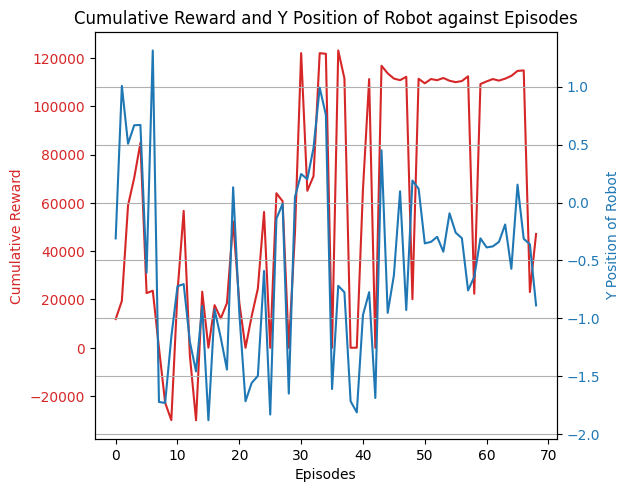

In [18]:
#comparison of yposition of robot vs rewards against episodes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Y Position of Robot', color=color)
ax2.plot(range(len(y_pos)), y_pos, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and Y Position of Robot against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_ypos.png')


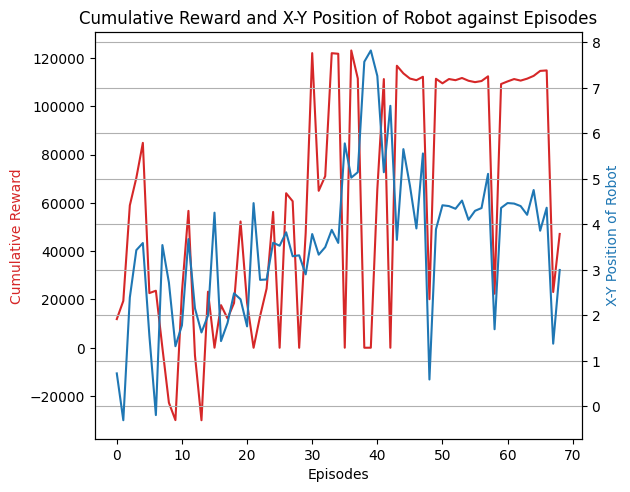

In [19]:
#Comparison of x-yposition of robot against rewards against episodes

x_sub_y = [x_pos[i] - y_pos[i] for i in range(len(x_pos))]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('X-Y Position of Robot', color=color)
ax2.plot(range(len(x_sub_y)), x_sub_y, color=color)
fig.tight_layout()
plt.title('Cumulative Reward and X-Y Position of Robot against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_xsuby.png')



['#{"t_start": 1713031196.0826173', 'r', '11849.32', '23047.0', '18633.344', '47546.438', '20086.27', '22353.068', '23066.39', '47122.29', '19382.43', '58953.414', '70360.25', '84857.125', '22628.229', '23598.783', '-13.813408', '-22785.107', '-30007.996', '56686.918', '-3205.9795', '-30052.264', '23194.72', '-4.0545883', '17628.543', '12096.534', '18524.004', '52291.96', '-36.191658', '13082.797', '24499.312', '56242.586', '-31.87468', '63992.22', '60681.37', '-42.774014', '122040.0', '64997.887', '71082.89', '122008.47', '121770.875', '-11.172138', '123129.164', '111533.9', '-18.655594', '-7.929188', '65651.89', '111283.83', '-31.673084', '116806.81', '113652.05', '111504.75', '110826.95', '112235.56', '111416.53', '109529.734', '111303.87', '110826.06', '111737.5', '110587.02', '110014.266', '110475.8', '112428.36', '109232.5', '110317.9', '111293.16', '110647.08', '111454.3', '112609.79', '114668.68', '114871.06']


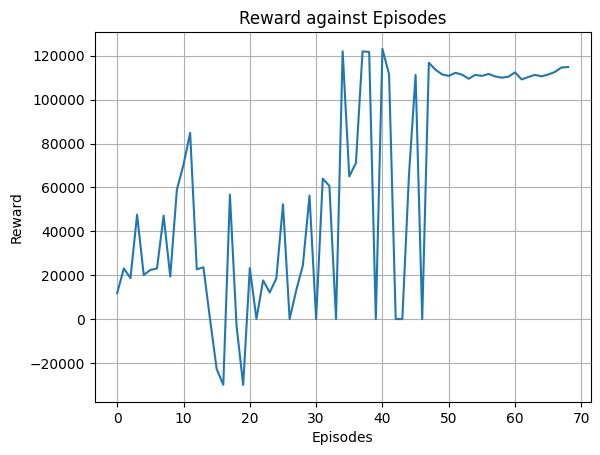

In [30]:
#Using the reward from monitor.csv
reward_list = []
with open('pyperbot_v2/logs/good_actions/monitor.csv', 'r') as f:
    for line in f:
        reward_list.append(line.split(',')[0])
print(reward_list)

reward_list = [float(i) for i in reward_list[2:]]

#plot of distance vs episodes
plt.plot(range(len(reward_list)), reward_list)
plt.title('Reward against Episodes')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_monitor.png')

